In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import scipy.stats as stats
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from collections import Counter
from tabulate import tabulate
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


FEATURE SCALING

In [ ]:
rbs = RobustScaler()
data_small = data[['Time','Amount']]
data_small = pd.DataFrame(rbs.fit_transform(data_small))
data_small.columns = ['scaled_time','scaled_amount']
data = pd.concat([data,data_small],axis=1)
data.drop(['Time','Amount'],axis=1,inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


In [ ]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]
new_data= pd.concat([non_fraud,fraud])
new_data = new_data.sample(frac=1)

In [ ]:
"""non_fraud = non_fraud.sample(frac=1)
non_fraud = non_fraud[:473]
new1_data= pd.concat([non_fraud,fraud])
new1_data = new1_data.sample(frac=1)
new1_data.shape"""

'non_fraud = non_fraud.sample(frac=1)\nnon_fraud = non_fraud[:473]\nnew1_data= pd.concat([non_fraud,fraud])\nnew1_data = new1_data.sample(frac=1)\nnew1_data.shape'

In [ ]:
new_data.shape

(284807, 31)

In [ ]:
new_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

CHECKING DUPLICATES

In [ ]:
# Check for and count duplicated rows
duplicated_count = new_data.duplicated().sum()
print("Number of duplicated rows:", duplicated_count)

Number of duplicated rows: 1081


In [ ]:
new_data = new_data.drop_duplicates(keep='first')

In [ ]:
new_data.duplicated().sum()

0

CHECKING FOR NULL VALUES

In [ ]:
total = new_data.isnull().sum().sort_values(ascending = False)
percent = (new_data.isnull().sum()/new_data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,V1,V17,scaled_time,Class,V28,V27,V26,V25,V24,V23,...,V11,V10,V9,V8,V7,V6,V5,V4,V3,scaled_amount
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
"""new_data['scaled_time'].fillna(new_data['scaled_time'].mean(), inplace=True)
new_data['scaled_amount'].fillna(new_data['scaled_amount'].mean(), inplace=True)"""

"new_data['scaled_time'].fillna(new_data['scaled_time'].mean(), inplace=True)\nnew_data['scaled_amount'].fillna(new_data['scaled_amount'].mean(), inplace=True)"

In [ ]:
new_data.shape

(283726, 31)

OUTLIER DETECTION

In [ ]:
target = 'Class'
predictors = ['scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'scaled_amount']
few_cols=['scaled_time', 'V1','V13','V16']

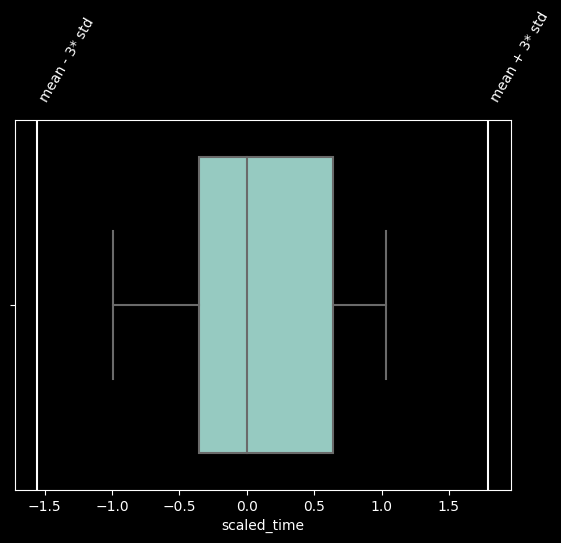

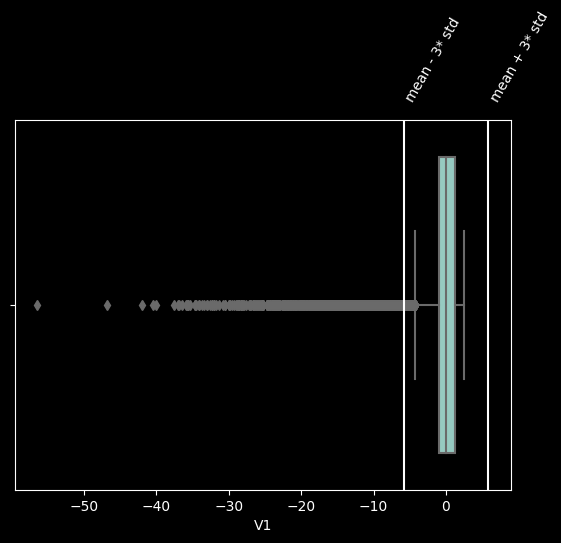

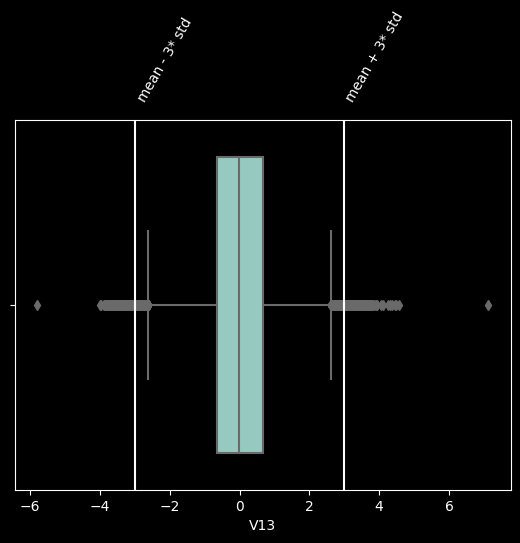

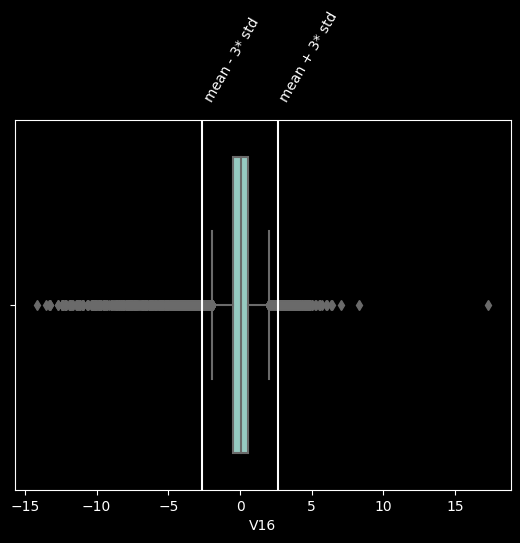

In [ ]:
plt.style.use('dark_background')
for var in few_cols:
    sns.boxplot(x=new_data[var],hue=new_data['Class'], palette='Set3')
    mean = new_data[var].mean()
    std = new_data[var].std()
    plt.axvline(mean - 3 * std, 0, 1)
    plt.text(mean - 3 * std, -0.55, 'mean - 3* std', rotation=60)
    plt.axvline(mean + 3 * std, 0, 1)
    plt.text(mean + 3 * std, -0.55, 'mean + 3* std', rotation=60)
    plt.show()


IQR METHOD

In [ ]:
def IQR_method (df,n,features):
    outlier_list = []

    for column in features:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        outlier_list.extend(outlier_list_column)

    #selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]

    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])

    return multiple_outliers

Outliers_IQR = IQR_method(new_data,1,predictors)

"""dropping outliers
new_data = new_data.drop(Outliers_IQR, axis = 0).reset_index(drop=True)"""

Total number of deleted outliers is: 31685


'dropping outliers\nnew_data = new_data.drop(Outliers_IQR, axis = 0).reset_index(drop=True)'

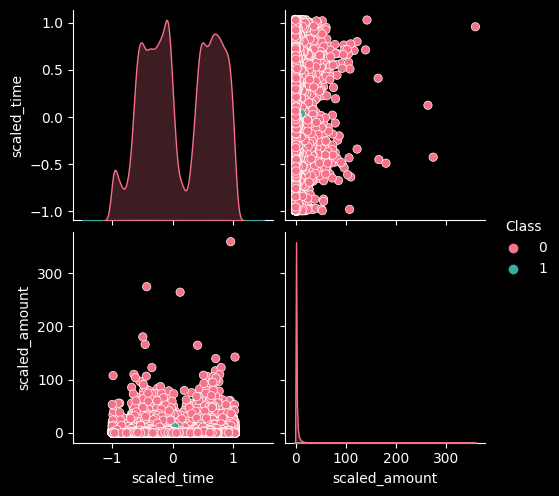

In [ ]:
plt.style.use('dark_background')
sns.pairplot(new_data,hue='Class',vars=['scaled_time','scaled_amount'], palette='husl')

<Axes: >

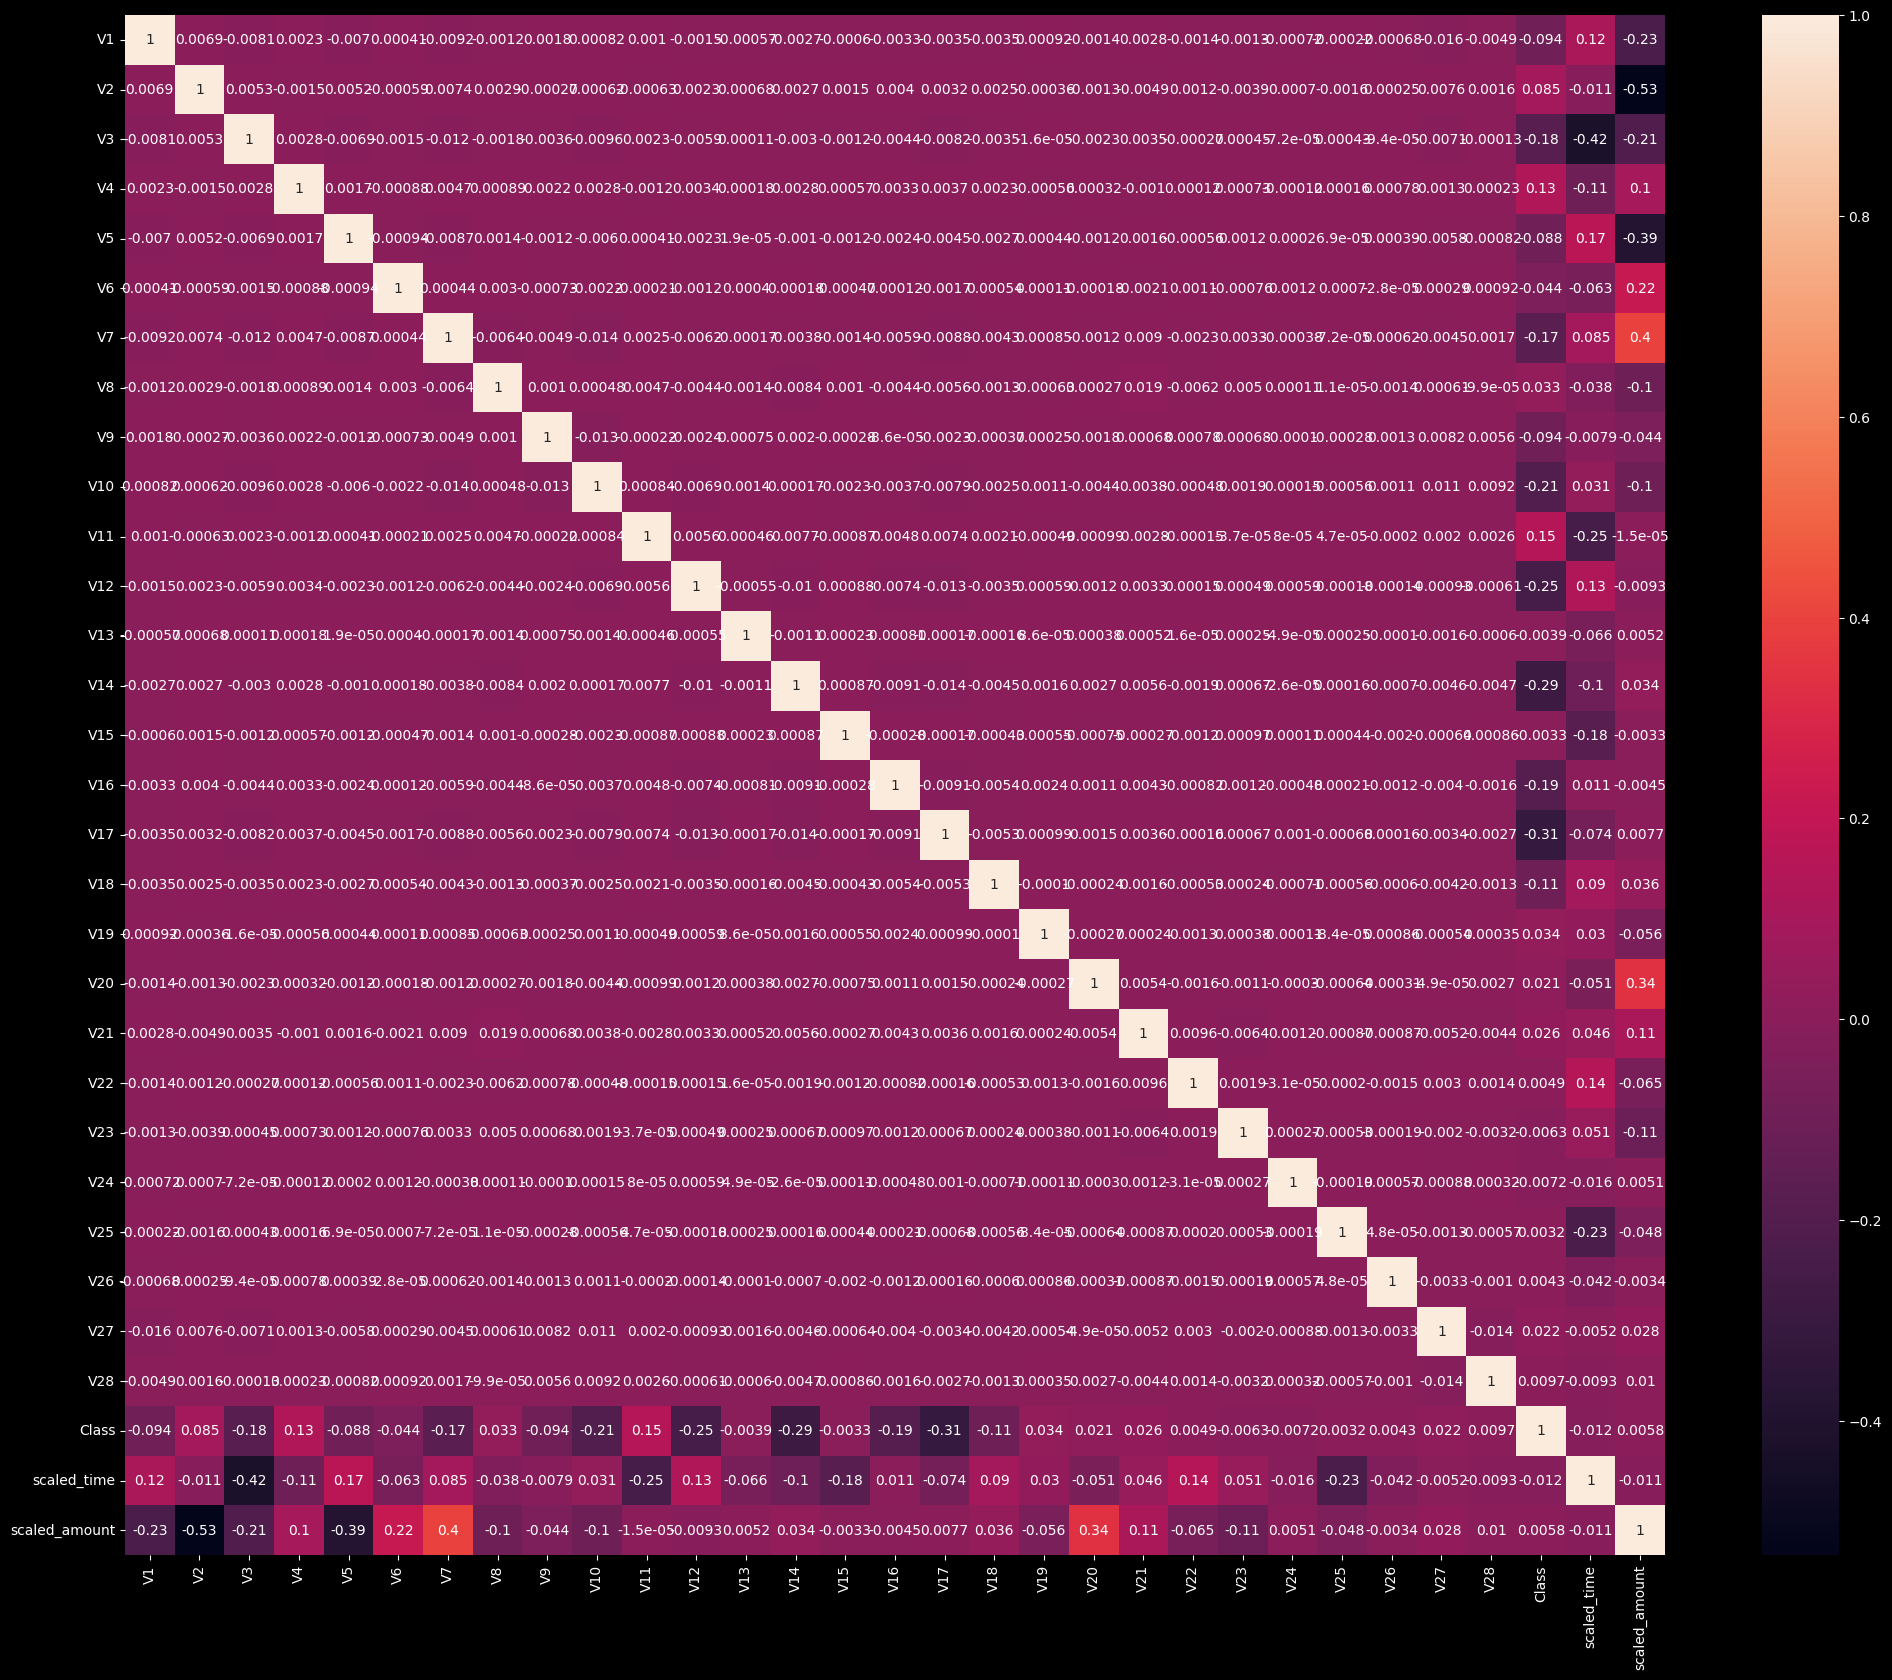

In [ ]:
plt.style.use('dark_background')
corr = new_data.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(data=corr, annot=True, square=True, cbar=True)

<Figure size 1000x600 with 0 Axes>

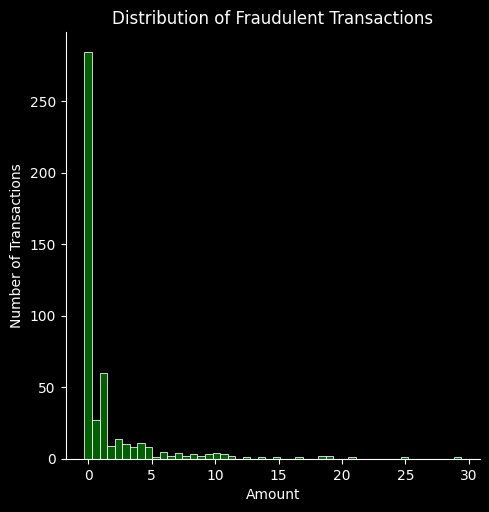

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
sns.displot(new_data[new_data['Class'] == 1]['scaled_amount'], bins=50, label='Fraud', kde=False,color='green')
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.show()

<Figure size 1000x600 with 0 Axes>

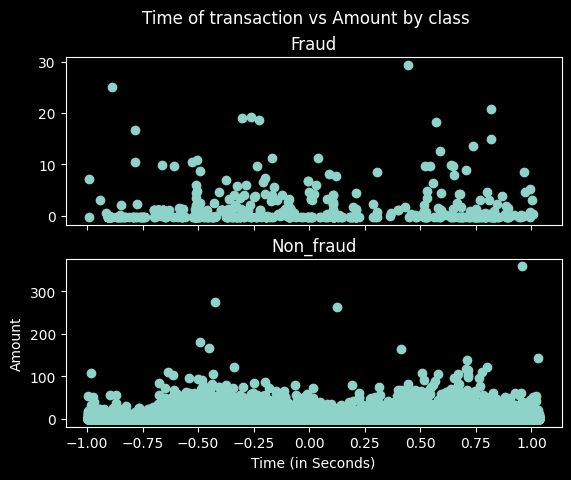

In [ ]:
plt.figure(figsize=(10,6))
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.scaled_time,fraud.scaled_amount)
ax1.set_title('Fraud')
ax2.scatter(non_fraud.scaled_time, non_fraud.scaled_amount)
ax2.set_title('Non_fraud')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show();

In [ ]:
def check_normality(feature):
    plt.figure(figsize=(4,4))
    ax1 = plt.subplot(1, 1, 1)
    stats.probplot(new_data[feature], dist=stats.norm, plot=ax1)
    ax1.set_title(f'{feature} Q-Q plot', fontsize=7)
    sns.despine()

    mean = new_data[feature].mean()
    std = new_data[feature].std()
    skew = new_data[feature].skew()
    print(f'{feature} : mean: {mean:.2f}, std: {std:.2f}, skew: {skew:.2f}')

scaled_amount : mean: 0.93, std: 3.50, skew: 16.98


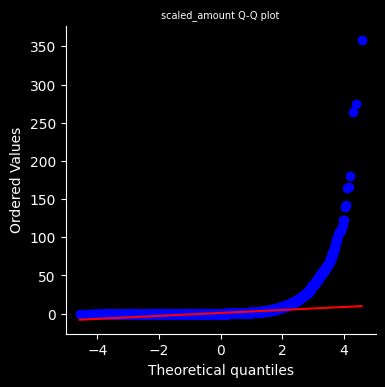

In [ ]:
check_normality("scaled_amount")

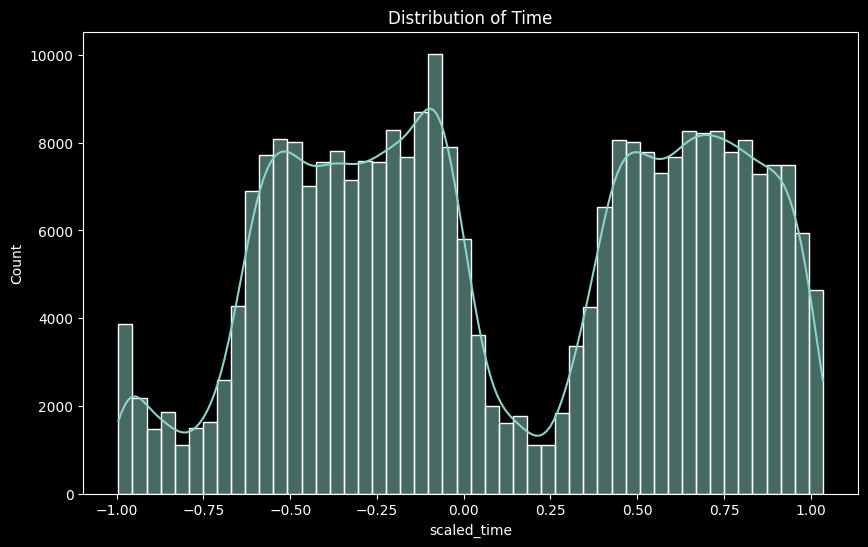

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(new_data['scaled_time'], bins=50, kde=True)
plt.title('Distribution of Time')
plt.show()

In [ ]:
class_0 = new_data.loc[new_data['Class'] == 0]["scaled_time"]
class_1 = new_data.loc[new_data['Class'] == 1]["scaled_time"]

hist_data = [class_0, class_1]
group_labels=["Non Fraud","Fraud"]
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

In [ ]:
X = new_data.drop(columns='Class', axis=1)
Y = new_data['Class']
X.isnull().sum()
total = X.isnull().sum().sort_values(ascending = False)
percent = (X.isnull().sum()/X.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,V1,V2,scaled_time,V28,V27,V26,V25,V24,V23,V22,...,V11,V10,V9,V8,V7,V6,V5,V4,V3,scaled_amount
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


OVERSAMPLING USING SMOTE

In [ ]:
print('Genuine:', round(new_data['Class'].value_counts()[0]/len(new_data) * 100,2), '% of the dataset')
print('Frauds:', round(new_data['Class'].value_counts()[1]/len(new_data) * 100,2), '% of the dataset')

Genuine: 99.83 % of the dataset
Frauds: 0.17 % of the dataset


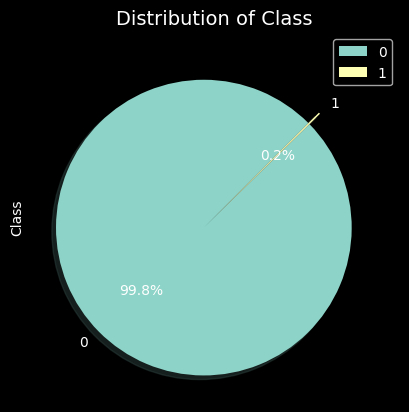

In [ ]:
new_data['Class'].value_counts()
new_data['Class'].value_counts().plot.pie(explode=[0.1,0],autopct='%3.1f%%'
                                    , shadow=True, legend= True,startangle =45)
plt.title('Distribution of Class',size=14)
plt.show()

In [ ]:
print(X.shape,Y.shape)
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(X, Y)
y_smote.value_counts()

(283726, 30) (283726,)


0    283253
1    283253
Name: Class, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_smote, y_smote,test_size=0.20, random_state=42)

In [ ]:
from sklearn.datasets import make_classification

oversampled_data = pd.DataFrame(data=x_smote,columns=x_smote.columns)
oversampled_data['Class']=y_smote
oversampled_data.shape
oversampled_data = oversampled_data.sample(frac=1)
print(Counter(y_smote),oversampled_data.shape)

Counter({0: 283253, 1: 283253}) (566506, 31)


In [ ]:
print('Genuine:', round(oversampled_data['Class'].value_counts()[0]/len(oversampled_data) * 100,2), '% of the dataset')
print('Frauds:', round(oversampled_data['Class'].value_counts()[1]/len(oversampled_data) * 100,2), '% of the dataset')

Genuine: 50.0 % of the dataset
Frauds: 50.0 % of the dataset


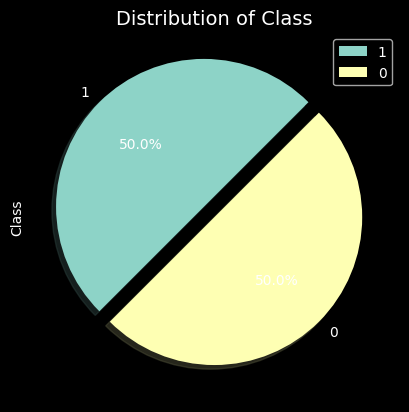

In [ ]:
oversampled_data['Class'].value_counts().plot.pie(explode=[0.1,0],autopct='%3.1f%%'
                                     ,shadow=True, legend= True,startangle =45)
plt.title('Distribution of Class',size=14)
plt.show()

In [ ]:
X = oversampled_data.drop(columns='Class', axis=1)
Y = oversampled_data['Class']
X.isnull().sum()
flag=1

MULTICOLLINEARITY

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(566506, 30) (453204, 30) (113302, 30)


In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#a DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns

#VIF for each predictor variable
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df)


         variable        VIF
0              V1  12.086881
1              V2  17.645097
2              V3  31.789647
3              V4   9.506020
4              V5  23.183263
5              V6   3.396278
6              V7  52.747700
7              V8   5.040026
8              V9   6.664026
9             V10  23.356984
10            V11  13.803809
11            V12  26.095076
12            V13   1.144228
13            V14  19.506859
14            V15   1.299917
15            V16  25.841476
16            V17  33.533505
17            V18  13.435808
18            V19   2.519742
19            V20   3.077877
20            V21   3.293482
21            V22   2.104816
22            V23   1.778236
23            V24   1.195779
24            V25   1.592587
25            V26   1.130160
26            V27   1.810965
27            V28   1.391231
28    scaled_time   2.181687
29  scaled_amount   7.830025


In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)

variable_names = ["v1", "v2", "v3", "v4", "v5", "v6", "v7", "v8", "v9", "v10",
                 "v11", "v12", "v13", "v14", "v15", "v16", "v17", "v18", "v19", "v20",
                 "v21", "v22", "v23", "v24", "v25", "v26", "v27", "v28", "scaled_time","scaled_amount"]


ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)

# Coefficients after Ridge regularization
coefficients = ridge.coef_

for i, var in enumerate(variable_names):
    print(f'{var}: {coefficients[i]}')
Y_train = Y_train.values.ravel()

v1: -0.08152658983621291
v2: 0.02530731242012652
v3: -0.05334535662753395
v4: 0.18243291037589698
v5: 0.01443799758951675
v6: -0.02733062753350624
v7: 0.17747431940730418
v8: -0.07664151914313296
v9: 0.03364191906167147
v10: -0.11932976008018144
v11: -0.009223280039673588
v12: 0.10988857815585377
v13: -0.034414675284901525
v14: -0.2609247362438763
v15: 0.0005296567306635186
v16: -0.0030732782406548893
v17: -0.08803555561616005
v18: 0.08891550156616145
v19: 0.019679440216520287
v20: 0.01549546275546333
v21: 0.05036414896357177
v22: 0.027412636477364548
v23: -0.02155126462437202
v24: 0.0035442560718243945
v25: 0.004762830156925945
v26: -0.04071477905125698
v27: -0.009858933896864538
v28: 0.01967064885635335
scaled_time: -0.03063967474204728
scaled_amount: 0.012441980697891247


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression(random_state=42,max_iter=1000)

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, random_state=42)

FEATURE IMPORTANCE

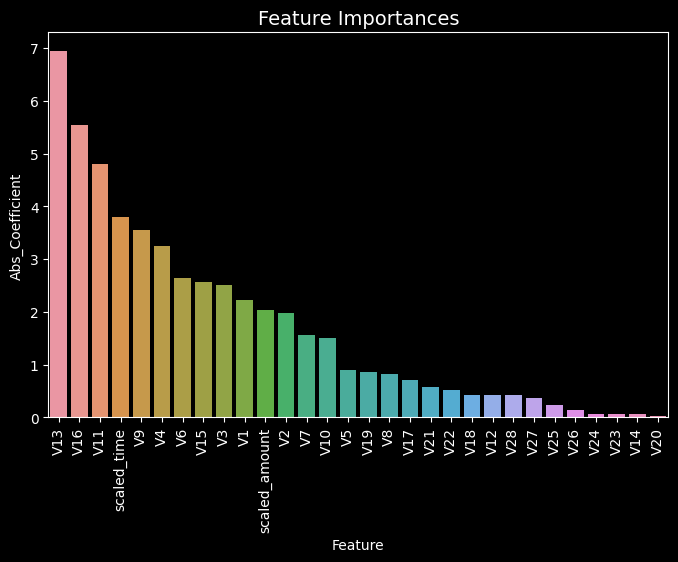

In [ ]:
coefficients = model.coef_[0]

# a DataFrame to store feature names and their corresponding coefficients
tmp = pd.DataFrame({'Feature': predictors, 'Coefficient': coefficients})

# Sort the features by absolute coefficient value in descending order
tmp['Abs_Coefficient'] = tmp['Coefficient'].abs()
tmp = tmp.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(8,5))
plt.title('Feature Importances', fontsize=14)
s = sns.barplot(x='Feature', y='Abs_Coefficient', data=tmp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()


MODEL PREDICITION

In [ ]:
# accuracy on training data
Y_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_pred,Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9472312689208392


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9480944731778785


METRICS FOR MODEL EVALUATION

In [ ]:
def metrics(model_name, y_train, y_test, y_hat_train, y_hat_test):
    '''Print out the evaluation metrics for a given models predictions'''
    print(f'Model: {model_name}', )
    print('-'*60)
    # Calculate confusion matrix
    cm_test = confusion_matrix(y_test, y_hat_test)
    cm_train = confusion_matrix(y_train, y_hat_train)

    #plot_confusion_matrix(y_test,y_hat_test)
    # Display confusion matrix for Test Data
    print('Confusion Matrix for Test Data:')
    printd=pd.DataFrame(cm_test, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])
    printd
    # Display confusion matrix as a plot
    plt.figure(figsize=(2, 1))
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Display confusion matrix for Train Data
    print('\n\nConfusion Matrix for Train Data:')
    printd=pd.DataFrame(cm_train, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])
    # Display confusion matrix for the training data as a plot
    plt.figure(figsize=(2, 1))
    sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f'Test accuracy: {round(accuracy_score(y_test, y_hat_test),2)}')
    print(f'Train accuracy: {round(accuracy_score(y_train, y_hat_train),2)}')
    print('-'*60)
    print('-'*60)
    print('Confusion Matrix:\n',pd.crosstab(y_test, y_hat_test,rownames=['Actual'],colnames=['Predicted'],margins = True))
    print('\nTest report:\n' + classification_report(y_test, y_hat_test))
    print('~'*60)
    print('\nTrain report:\n' + classification_report(y_train, y_hat_train))
    print('-'*60)
    print('\n\n')

LR Accuracy Score is :  0.9480944731778785
(113302,) (453204,)
[0 0 0 ... 0 1 0]
Model: LR
------------------------------------------------------------
Confusion Matrix for Test Data:


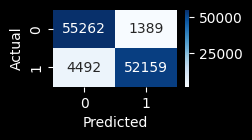



Confusion Matrix for Train Data:


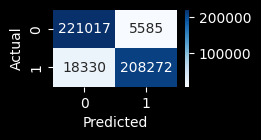

Test accuracy: 0.95
Train accuracy: 0.95
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted      0      1     All
Actual                         
0          55262   1389   56651
1           4492  52159   56651
All        59754  53548  113302

Test report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56651
           1       0.97      0.92      0.95     56651

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Train report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    226602
           1       0.97      0.92      0.95    226602

    accuracy                           0.95    453204
   macro avg       0.95

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

models = []
models.append(('LR', LogisticRegression(max_iter=1000)))

for name, model in models:
    model.fit(X_train, Y_train)
    Y_hat_test = model.predict(X_test).astype(int)
    Y_hat_train = model.predict(X_train).astype(int)
    print(name, 'Accuracy Score is : ', accuracy_score(Y_test, Y_hat_test))
    print(Y_hat_test.shape,Y_hat_train.shape)
    print(Y_hat_test)
    metrics(name, Y_train, Y_test, Y_hat_train, Y_hat_test)

CROSS VALIDATION

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,cross_validate

cv = RepeatedKFold(n_splits=5, n_repeats= 100, random_state=1)
model = LogisticRegression(max_iter=1000)

scores = cross_validate(model, X_train, Y_train, scoring='accuracy', cv=5)
print(scores['test_score'])
print(np.mean(scores['test_score']))

[0.94815812 0.9474741  0.94670182 0.94685628 0.94674537]
0.9471871377089094


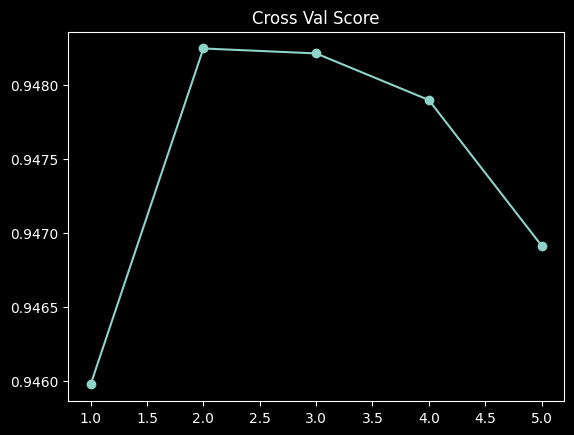

In [ ]:
cvs = cross_val_score(model,X,Y, cv=5, scoring="f1_macro")
plt.plot(range(1, len(cvs) + 1), cvs, "o-")
plt.title("Cross Val Score")
plt.show()

In [ ]:
#pip install sklearn_evaluation

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
transaction_data = pd.DataFrame({
    'Time': [16],
    'V1': [1.322707269],
    'V2': [-0.174040833],
    'V3': [0.434555031],
    'V4': [0.576037652],
    'V5': [-0.836758046],
    'V6': [-0.831083411],
    'V7': [-0.264904961],
    'V8': [-0.220981943],
    'V9': [-1.071424618],
    'V10': [0.868558548],
    'V11': [-0.64150629],
    'V12': [-0.111315775],
    'V13': [0.36148541],
    'V14': [0.171945122],
    'V15': [0.782166532],
    'V16': [-1.35587073],
    'V17': [-0.216935153],
    'V18': [1.271765385],
    'V19': [-1.240621935],
    'V20': [-0.522950941],
    'V21': [-0.284375572],
    'V22': [-0.323357411],
    'V23': [-0.037709905],
    'V24': [0.347150939],
    'V25': [0.559639137],
    'V26': [-0.280158166],
    'V27': [0.042335258],
    'V28': [0.0288223],
    'Amount': [0],
    'Class': [0]
  })

new_predictions = model.predict(X)

if new_predictions[0] == 1:
    print("Time: 16\nPredict: Fraudulent Transaction")
else:
    print("Time: 16\nPredict: Genuine Transaction")

Time: 16
Predict: Fraudulent Transaction


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



PATE

In [ ]:
print("Training : ",X_train.shape,Y_train.shape)

Training :  (453204, 30) (453204,)


In [ ]:
print("Testing : ",X_test.shape,Y_test.shape)

Testing :  (113302, 30) (113302,)


In [ ]:
def private_aggregate_teacher_predictions(oversampled_data, num_teachers, epsilon):
    x = oversampled_data.drop(columns=['Class'])
    y = oversampled_data['Class']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    teacher_models = []

    for i in range(num_teachers):
        x_train_teacher, x_test_teacher, y_train_teacher, y_test_teacher = train_test_split(x_train, y_train, test_size=0.5, random_state=i)

        teacher_model = LogisticRegression(max_iter=1000)
        teacher_model.fit(x_train_teacher, y_train_teacher)
        teacher_models.append(teacher_model)

        teacher_accuracy = accuracy_score(y_test_teacher,teacher_model.predict(x_test_teacher))
        print(f"Teacher {i} accuracy: {teacher_accuracy}")

    teacher_predictions = []

    for teacher_model in teacher_models:
        teacher_pred = teacher_model.predict(x_test)
        teacher_predictions.append(teacher_pred)

    final_aggregated_predictions = []

    for i in range(len(x_test)):
        class_counts = [0, 0]

        for teacher_prediction in teacher_predictions:
            class_counts[teacher_prediction[i]] += 1

        #adding noise
        noisy_counts = [count + np.random.laplace(scale=1/epsilon) for count in class_counts]

        max_votes = max(noisy_counts)
        selected_classes = [j for j, vote in enumerate(noisy_counts) if vote == max_votes]
        final_prediction = np.random.choice(selected_classes)

        final_aggregated_predictions.append(final_prediction)

    aggregated_accuracy = accuracy_score(y_test,final_aggregated_predictions)
    print(f"Aggregated predictions accuracy: {aggregated_accuracy}")

    return final_aggregated_predictions

num_teachers = 5
epsilon = 1.0
aggregated_predictions = private_aggregate_teacher_predictions(oversampled_data, num_teachers, epsilon)
print("Final aggregated predictions for all test data points:", aggregated_predictions)

Teacher 0 accuracy: 0.9470966716975137
Teacher 1 accuracy: 0.9468230642271471
Teacher 2 accuracy: 0.947114323792376
Teacher 3 accuracy: 0.9475953433773753
Teacher 4 accuracy: 0.9480234066777875
Aggregated predictions accuracy: 0.9369207957494131
Final aggregated predictions for all test data points: [0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,

FEDERATED LEARNING

In [ ]:
import numpy as np
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -15, 15)))

x = oversampled_data.drop(columns=['Class'])
y = oversampled_data['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
sample_fraction = 0.5
x_train = x_train.sample(frac=sample_fraction, random_state=42)
y_train = y_train.loc[x_train.index]

num_clients = 2

global_weights = np.zeros(x_train.shape[1])

client_weights = [np.zeros(x_train.shape[1]) for _ in range(num_clients)]

num_epochs = 1
learning_rate = 0.1

for epoch in range(num_epochs):
    for client_id in range(num_clients):
        local_weights = client_weights[client_id]
        for i in range(len(x_train)):
            x_i = x_train.iloc[i].values
            y_i = y_train.iloc[i]
            z = np.dot(x_i, local_weights)
            h = sigmoid(z)
            gradient = (h-y_i) * x_i
            local_weights -= learning_rate * gradient

        # Print log loss for each client after the first epoch
        if epoch == 0 or epoch==1:
            z_values = np.dot(x_train.values, local_weights)
            h_values = sigmoid(z_values)
            loss = log_loss(y_train,h_values)
            #print(f'Client {client_id} - Log Loss: {loss}')
            accuracy = accuracy_score(y_train,(h_values >= 0.5).astype(int))
            print(f'Client {client_id} - Log Loss: {loss}, Accuracy: {accuracy}')

        client_weights[client_id] = local_weights

    global_weights = np.mean(client_weights, axis=0)

z_values = np.dot(x_test.values,global_weights)
h_values = sigmoid(z_values)

global_predictions = (h_values >= 0.5).astype(int)
print("Global Predictions : ",global_predictions)

global_accuracy = accuracy_score(y_test, global_predictions)
print("Global Model Accuracy: ", global_accuracy)

Client 0 - Log Loss: 0.36181289811944317, Accuracy: 0.9190827971509519
Client 1 - Log Loss: 0.36181289811944317, Accuracy: 0.9190827971509519
Global Predictions :  [0 1 0 ... 0 0 1]
Global Model Accuracy:  0.9188716880549328
